# Treinamento de Agente em Labirinto com Aprendizado por Reforço

Neste código, um agente é treinado para navegar por um labirinto usando aprendizado por reforço. O labirinto é representado como uma grade e o agente pode executar quatro ações possíveis: 
* mover para cima, mover para baixo, mover para a esquerda e mover para a direita. 

O objetivo do agente é aprender a política ótima que o guia do estado inicial ao estado objetivo, maximizando a recompensa acumulada.

## Configurações iniciais

Inicializar as configurações iniciais do ambiente do labirinto, como o tamanho do labirinto, o número de ações possíveis, a taxa de aprendizado, o fator de desconto e o número de episódios de treinamento. Além disso, inicializar uma matriz chamada q_table que será usada para armazenar os valores da função Q.

In [1]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# Tamanho do labirinto
GRID_SIZE = 10

# Número de ações possíveis (cima, baixo, esquerda, direita)
NUM_ACTIONS = 4

# Taxa de aprendizado
LEARNING_RATE = 0.1

# Fator de desconto
DISCOUNT_FACTOR = 0.9

# Número de episódios de treinamento
NUM_EPISODES = 25

# Inicialização da tabela-Q
q_table = np.zeros((GRID_SIZE, GRID_SIZE, NUM_ACTIONS))


## Definição de funções 

Definir duas funções: 

* `choose_action`: que escolhe uma ação com base na estratégia epsilon-greedy.
* `run_episode`: que executa um episódio de treinamento do agente no labirinto. 

A função choose_action decide se o agente deve explorar (escolhendo uma ação aleatória) ou explorar (escolhendo a ação com maior valor Q) com base no valor de epsilon. A função run_episode simula o movimento do agente no labirinto, atualiza a tabela Q com base na recompensa e na equação de Bellman.

In [2]:
# Função para escolher uma ação epsilon-greedy
def choose_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.randint(0, NUM_ACTIONS - 1)  # Escolhe uma ação aleatória
    else:
        return np.argmax(q_table[state[0], state[1]])

# Função para executar um episódio
def run_episode():
    state = [0, 0]  # Estado inicial
    goal = [GRID_SIZE - 1, GRID_SIZE - 1]  # Objetivo
    epsilon = 0.1  # Valor de epsilon para exploração

    while state != goal:
        action = choose_action(state, epsilon)
        new_state = state.copy()

        # Simulação de movimento do agente
        if action == 0:  # Mover para cima
            new_state[0] = max(0, state[0] - 1)
        elif action == 1:  # Mover para baixo
            new_state[0] = min(GRID_SIZE - 1, state[0] + 1)
        elif action == 2:  # Mover para a esquerda
            new_state[1] = max(0, state[1] - 1)
        elif action == 3:  # Mover para a direita
            new_state[1] = min(GRID_SIZE - 1, state[1] + 1)

        reward = -1  # Recompensa por movimento

        # Atualização da tabela-Q usando a equação de Bellman
        q_table[state[0], state[1], action] = (1 - LEARNING_RATE) * q_table[state[0], state[1], action] + LEARNING_RATE * (reward + DISCOUNT_FACTOR * np.max(q_table[new_state[0], new_state[1]]))

        state = new_state


## Treinamento do agente

Esta célula treina o agente executando um número de episódios especificado por NUM_EPISODES. Cada episódio é executado chamando a função run_episode.

In [3]:
# Treinamento do agente
for episode in range(NUM_EPISODES):
    run_episode()


## Exibição da tabela-Q após o treinamento

Esta célula exibe a tabela Q após o treinamento. A tabela Q contém os valores estimados para a função Q após o treinamento.

In [4]:
# Mostrar a tabela-Q após o treinamento
print("Tabela-Q após o treinamento:")
print(q_table)


Tabela-Q após o treinamento:
[[[-2.52622635 -2.55544068 -2.59271082 -2.57455812]
  [-2.37217766 -2.34361647 -2.34714933 -2.39335545]
  [-2.29149464 -2.30203814 -2.24817932 -2.25942923]
  [-2.13129531 -2.16235849 -2.20131368 -2.14665997]
  [-1.97981313 -2.0319107  -2.08305661 -1.95726455]
  [-1.90272132 -1.93505784 -1.90451127 -1.91311552]
  [-1.79924207 -1.86648185 -1.868155   -1.78901765]
  [-1.73816203 -1.78762582 -1.78324968 -1.79432984]
  [-1.73768678 -1.78251458 -1.75018017 -1.71868315]
  [-1.72772226 -1.70991331 -1.73933617 -1.73831376]]

 [[-2.39572856 -2.33331541 -2.37654853 -2.37181353]
  [-2.25226197 -2.27055935 -2.28866427 -2.28978665]
  [-2.20971627 -2.20760682 -2.19156625 -2.22249242]
  [-2.15846146 -2.09466443 -2.09739811 -2.16151737]
  [-1.99151466 -1.99308045 -2.06446638 -2.04441665]
  [-1.9056669  -1.90873888 -1.97809375 -1.84169678]
  [-1.80976257 -1.84819235 -1.8020887  -1.85948595]
  [-1.80395142 -1.80440494 -1.79658686 -1.7662506 ]
  [-1.72170721 -1.74762663 -1.783

## Visualização da política aprendida

a política aprendida pelo agente é visualizada. A política é obtida encontrando a ação com o maior valor Q para cada estado.

In [5]:
# Visualização da política aprendida
policy = np.argmax(q_table, axis=2)
print("\nPolítica aprendida:")
print(policy)


Política aprendida:
[[0 1 2 0 3 0 3 0 3 1]
 [1 0 2 1 0 3 2 3 0 1]
 [2 2 2 3 1 0 3 3 0 3]
 [3 1 1 3 1 1 2 0 0 2]
 [3 1 0 3 1 1 2 0 3 2]
 [1 2 2 1 1 2 1 1 3 1]
 [2 1 3 0 0 3 3 2 3 3]
 [0 2 2 2 1 1 3 2 0 2]
 [1 1 1 2 1 1 2 3 1 1]
 [1 1 3 0 1 2 3 0 0 0]]


A política aprendida é uma representação das ações que o agente deve tomar em cada estado do labirinto para maximizar a recompensa esperada. Cada elemento da matriz representa um estado no labirinto e contém um valor que indica qual ação o agente deve escolher naquele estado. Os valores são mapeados da seguinte forma:

- 0: Mover para cima
- 1: Mover para baixo
- 2: Mover para a esquerda
- 3: Mover para a direita

Portanto, a política aprendida mostra as ações recomendadas para cada posição no labirinto. Por exemplo, se você olhar para a célula [0, 0], que é o canto superior esquerdo, o valor 1 indica que o agente deve escolher a ação de "Mover para baixo" nesse estado. Da mesma forma, a célula [0, 1] tem um valor de 2, o que significa que o agente deve escolher a ação "Mover para a esquerda" no próximo estado.


## Desenho do labirinto com setas vermelhas representando a política aprendida

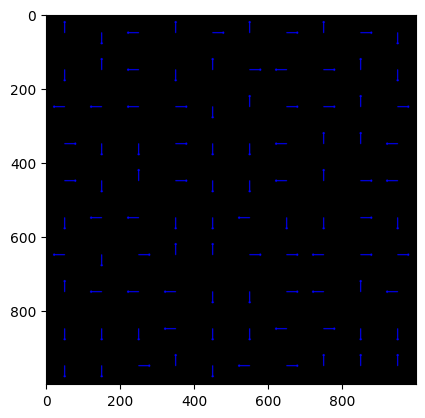

In [6]:
# Criar matriz de cores para as setas vermelhas
arrow_color = np.zeros((GRID_SIZE, GRID_SIZE, 3), dtype=np.uint8)
arrow_color[:, :, 2] = 255  # Define o canal vermelho como 255 (vermelho)

# Desenhar o labirinto com as setas vermelhas
cell_size = 100
maze = np.zeros((GRID_SIZE * cell_size, GRID_SIZE * cell_size, 3), dtype=np.uint8)

for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        if policy[i, j] == 0:  # Cima
            cv2.arrowedLine(maze, (j * cell_size + cell_size // 2, i * cell_size + cell_size // 2), (j * cell_size + cell_size // 2, i * cell_size + cell_size // 2 - 30), (0, 0, 255), 2)
        elif policy[i, j] == 1:  # Baixo
            cv2.arrowedLine(maze, (j * cell_size + cell_size // 2, i * cell_size + cell_size // 2), (j * cell_size + cell_size // 2, i * cell_size + cell_size // 2 + 30), (0, 0, 255), 2)
        elif policy[i, j] == 2:  # Esquerda
            cv2.arrowedLine(maze, (j * cell_size + cell_size // 2, i * cell_size + cell_size // 2), (j * cell_size + cell_size // 2 - 30, i * cell_size + cell_size // 2), (0, 0, 255), 2)
        elif policy[i, j] == 3:  # Direita
            cv2.arrowedLine(maze, (j * cell_size + cell_size // 2, i * cell_size + cell_size // 2), (j * cell_size + cell_size // 2 + 30, i * cell_size + cell_size // 2), (0, 0, 255), 2)

plt.imshow(maze)
plt.show()
